In [138]:
%matplotlib inline

import matplotlib
import pylab
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits as pyfits

<matplotlib.contour.QuadContourSet instance at 0x1a78cca28>

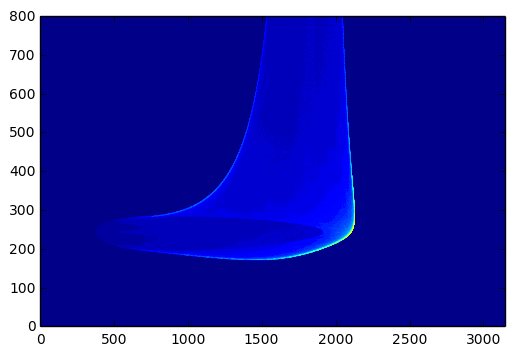

In [139]:
# Files
file1='/Users/javier/timing/code/tdenergy.fits'

####### Read file 1
hdulist1 = pyfits.open(file1)
data1 = hdulist1[0].data

#normalize
maxD = np.amax(data1)
data = np.divide(data1,maxD)
data = np.sqrt(data1)

# Plot
levels = np.linspace(0, 1, 50)
pylab.contourf(data,levels=levels)

In [178]:
# Files
file1='/Users/javier/timing/code/tddata.fits'

####### Read file 1
hdulist1 = pyfits.open(file1)
data1 = hdulist1[1].data

# load the data
time1d = data1['time1d']
inttime1d = data1['inttime1d']

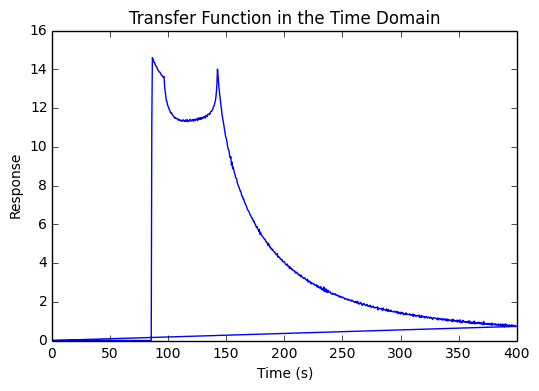

In [179]:
#time1d=time1d[0:800]
#inttime1d=inttime1d[0:800]

pylab.plot(time1d,inttime1d)

pylab.title("Transfer Function in the Time Domain")
pylab.xlabel("Time (s)")
pylab.ylabel("Response")

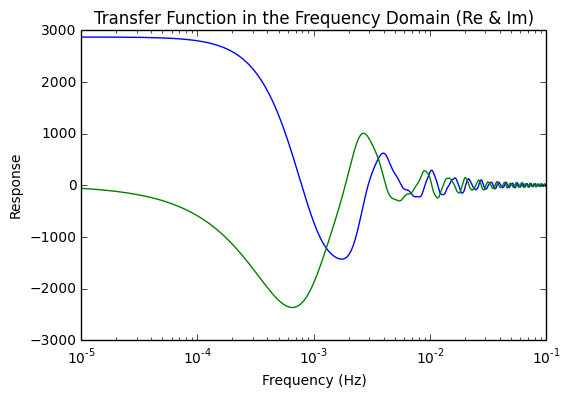

In [180]:
# Take the Fourier Transform
sp = np.fft.fft(inttime1d)
freq = np.fft.fftfreq(time1d.shape[-1])

pylab.semilogx(freq,sp.real)
pylab.xlim(1.e-5,1.e-1)

pylab.title("Transfer Function in the Frequency Domain (Re & Im)")
pylab.xlabel("Frequency (Hz)")
pylab.ylabel("Response")

pylab.semilogx(freq,sp.imag)

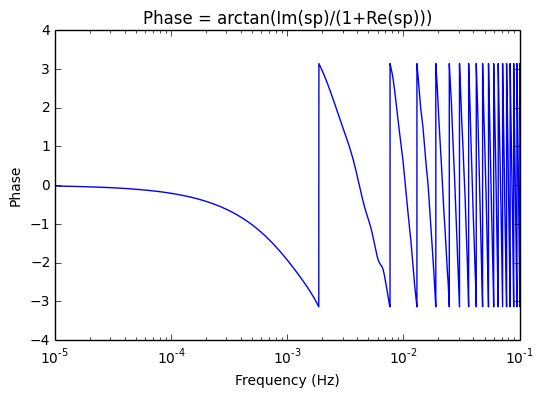

In [182]:
#phase = np.arctan(sp.imag/(sp.real))
phase = np.arctan2(sp.imag,1.+sp.real)

pylab.semilogx(freq,phase)

#pylab.semilogx(freq,np.angle(sp))
pylab.xlim(1.e-5,1.e-1)

pylab.title("Phase = arctan(Im(sp)/(1+Re(sp)))")
pylab.xlabel("Frequency (Hz)")
pylab.ylabel("Phase")


/Library/Python/2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


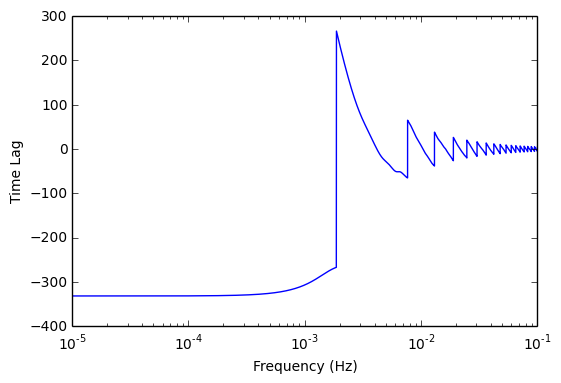

In [184]:
# Plot lags vs. freq
pylab.semilogx(freq,phase/(2.*np.pi*freq))
pylab.xlim(1.e-5,0.1)

pylab.xlabel("Frequency (Hz)")
pylab.ylabel("Time Lag")